In [55]:
from iterative_sir.sampling_utils.metrics import acl_spectrum, autocovariance
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [56]:
sample_flex = np.load('../dump/phi_four/flex_N_10_corr_30-11-2021_01:06_sample.npy')
sample_mala = np.load('../dump/phi_four/ex_N_2_30-11-2021_00:44_sample.npy')

# sample_flex = np.load('../dump/phi_four/flex_N_10_corr_30-11-2021_11:50_sample.npy')
# sample_mala = np.load('../dump/phi_four/ex_N_2_30-11-2021_11:26_sample.npy')

sample_flex = np.load('../dump/phi_four/flex_N_10_corr_30-11-2021_12:48_sample.npy')
sample_mala = np.load('../dump/phi_four/ex_N_2_30-11-2021_12:20_sample.npy')

sample_flex = sample_flex[-6500:, :, :]
sample_mala = sample_mala[-6500:, :, :]

In [57]:
n = sample_flex.shape[0] // 60 #10

acl_mala = acl_spectrum(sample_mala - sample_mala.mean(0), n=n).mean(-1).mean(-1)
acl_flex = acl_spectrum(sample_flex - sample_flex.mean(0), n=n).mean(-1).mean(-1)

In [66]:
np.savez('acf', mala=acl_mala, flex=acl_flex)

In [67]:
np.load('acf.npz')

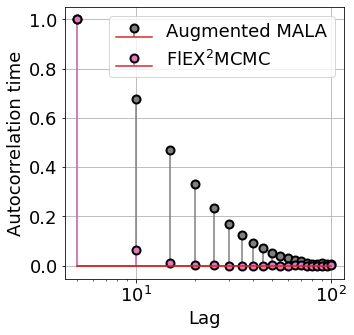

In [52]:
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc("font", size=MEDIUM_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig = plt.figure(figsize=(5, 5))

(markers, stemlines, baseline) = plt.stem((np.arange(len(acl_mala[::5]))+1)*5, acl_mala[::5], 'tab:grey', markerfmt='C7o', label='Augmented MALA')
plt.setp(markers, marker='o', markersize=8, markeredgecolor="black", markeredgewidth=2)
(markers, stemlines, baseline) = plt.stem((np.arange(len(acl_mala[::5]))+1)*5, acl_flex[::5], 'tab:pink',   markerfmt='C6o', label=r'FlEX$^2$MCMC')
plt.setp(markers, marker='o', markersize=8, markeredgecolor="black", markeredgewidth=2)

plt.xscale('log')

plt.xlabel('Lag')
plt.ylabel('Autocorrelation time')
plt.grid()
plt.legend()

# plt.savefig('allen_cahn_acl_log.pdf')
plt.show()

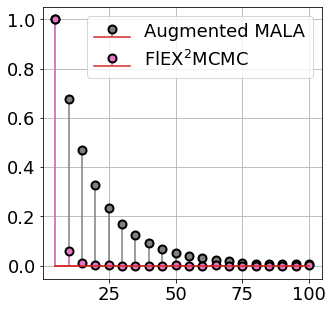

In [54]:
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc("font", size=MEDIUM_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig = plt.figure(figsize=(5, 5))
# plt.plot(np.arange(len(acl_mala))+1, acl_mala, label='Augmented MALA', color='tab:grey', linewidth=3)
# plt.plot(np.arange(len(acl_mala))+1, acl_flex, label=r'FlEX$^2$MCMC', color='tab:pink', linewidth=3)

(markers, stemlines, baseline) = plt.stem((np.arange(len(acl_mala[::5]))+1)*5, acl_mala[::5], 'tab:grey', markerfmt='C7o', label='Augmented MALA')
plt.setp(markers, marker='o', markersize=8, markeredgecolor="black", markeredgewidth=2)
(markers, stemlines, baseline) = plt.stem((np.arange(len(acl_mala[::5]))+1)*5, acl_flex[::5], 'tab:pink',   markerfmt='C6o', label=r'FlEX$^2$MCMC')
plt.setp(markers, marker='o', markersize=8, markeredgecolor="black", markeredgewidth=2)

plt.grid()
plt.legend()

plt.savefig('allen_cahn_acl.pdf')
plt.show()

In [31]:
samples = np.split(sample, 10, 0)

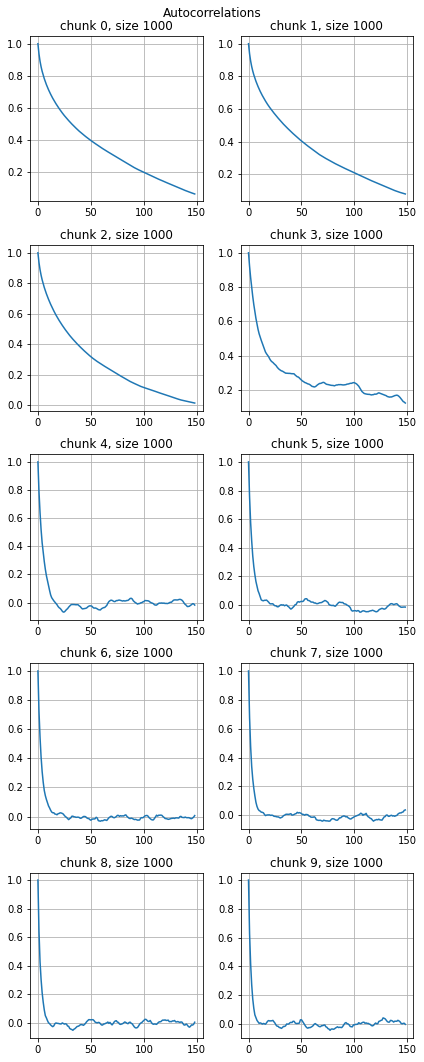

In [33]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(6, 15))
n = 150
plt.suptitle('Autocorrelations')

for i, (ax, sample) in enumerate(zip(axs.flatten(), samples)):
    acl = acl_spectrum(sample - sample.mean(0), n=n).mean(-1).mean(-1)
    ax.plot(acl)
    ax.set_title(f'chunk {i}, size {sample.shape[0]}')
    ax.grid()

fig.tight_layout()
plt.savefig('acls.png')
plt.show()